In [1]:
import matplotlib.pyplot as plt
import numpy as np

from src.linear_model import LinearModel
import src.util as util

In [3]:
ds1_training_set_path = 'data/ds1_train.csv'
ds1_valid_set_path = 'data/ds1_valid.csv'
ds2_training_set_path = 'data/ds2_train.csv'
ds2_valid_set_path = 'data/ds2_valid.csv'

In [9]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        :param x: Training example inputs. Shape (m, n).
        :param y: Training example labels. Shape (m,).
        """

        def h(theta, x):
            """Vectorized implementation of h_theta(x) = 1 / (1 + exp(-theta^T x)).

            :param theta: Shape (n,).
            :param x:     All training examples of shape (m, n).
            :return:      The hypothesis for all training examples. Shape (m,).
            """
            return 1 / (1 + np.exp(-np.dot(x, theta)))

        def gradient(theta, x, y):
            """Vectorized implementation of the gradient of J(theta).

            :param theta: Shape (n,).
            :param x:     All training examples of shape (m, n).
            :param y:     All labels of shape (m,).
            :return:      The gradient of shape (n,).
            """
            m, _ = x.shape
            return -1 / m * np.dot(x.T, (y - h(theta, x)))

        def hessian(theta, x):
            """Vectorized implementation of the Hessian of J(theta).

            :param theta: Shape (n,).
            :param x:     All training examples of shape (m, n).
            :return:      The Hessian of shape (n, n).
            """
            m, _ = x.shape
            h_theta_x = np.reshape(h(theta, x), (-1, 1))
            return 1 / m * np.dot(x.T, h_theta_x * (1 - h_theta_x) * x)

        def next_theta(theta, x, y):
            """The next theta updated by Newton's Method.

            :param theta: Shape (n,).
            :return:      The updated theta of shape (n,).
            """
            return theta - np.dot(np.linalg.inv(hessian(theta, x)), gradient(theta, x, y))

        m, n = x.shape

        # Initialize theta
        if self.theta is None:
            self.theta = np.zeros(n)

        # Update theta using Newton's Method
        old_theta = self.theta
        new_theta = next_theta(self.theta, x, y)
        while np.linalg.norm(new_theta - old_theta, 1) >= self.eps:
            old_theta = new_theta
            new_theta = next_theta(old_theta, x, y)

        self.theta = new_theta

    def predict(self, x):
        """Make a prediction given new inputs x.

        :param x: Inputs of shape (m, n).
        :return:  Outputs of shape (m,).
        """

        return x @ self.theta >= 0

In [2]:
class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """
        # *** START CODE HERE ***
        m, n = x.shape
        
        phi = np.sum(y) / m
        mu_0 = np.dot(x.T, 1 - y) / np.sum(1 - y)
        mu_1 = np.dot(x.T, y) / np.sum(y)
        
        y = np.reshape(y, (m, -1))
        
        mu_x = y * mu_1 + (1 - y) * mu_0
        
        x_centered = x - mu_x
        
        sigma = np.dot(x_centered.T, x_centered) / m
        sigma_inv = np.linalg.inv(sigma)
        
        theta = np.dot(sigma_inv, mu_1 - mu_0)
        b = 1 / 2 * mu_0 @ sigma_inv @ mu_0 - 1 / 2 * mu_1 @ sigma_inv @ mu_1 - np.log((1 - phi) / phi)
        
        self.theta = np.insert(theta, 0, b)
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        return util.add_intercept(x) @ self.theta >= 0
        # *** START CODE HERE ***
        # *** END CODE HERE


In [4]:
x_train, y_train = util.load_dataset(ds1_training_set_path)
x_valid, y_valid = util.load_dataset(ds1_valid_set_path)

In [6]:
gda_model = GDA()
gda_model.fit(x_train, y_train)

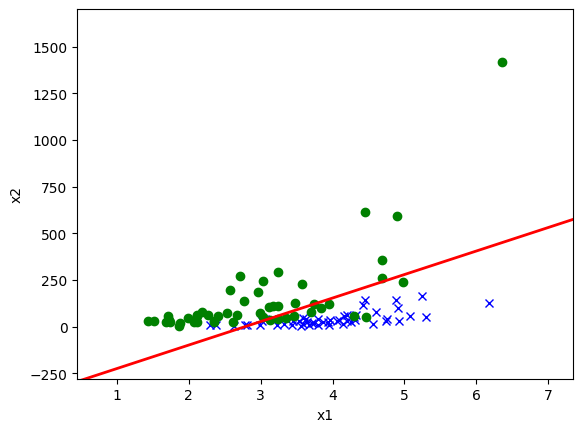

In [7]:
util.plot(x_valid, y_valid, theta=gda_model.theta)

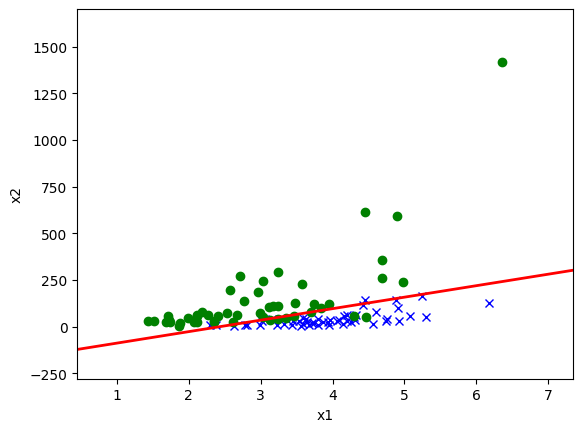

In [12]:
logistic_model = LogisticRegression()
logistic_model.fit(util.add_intercept(x_valid), y_valid)
util.plot(util.add_intercept(x_valid), y_valid, theta=logistic_model.theta)

In [18]:
x_train, y_train = util.load_dataset(ds2_training_set_path, add_intercept=True)
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

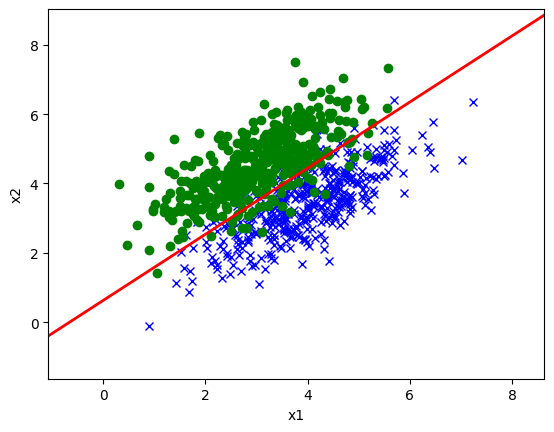

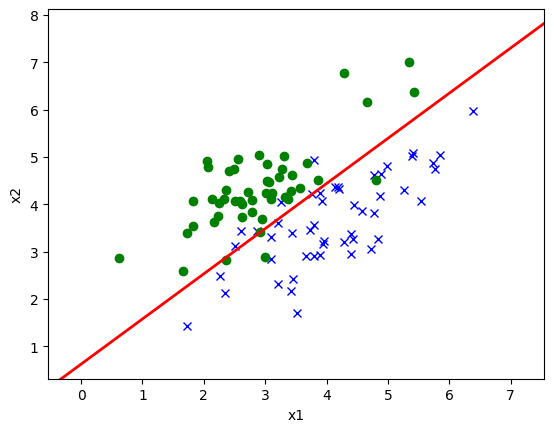

In [22]:
x_valid, y_valid = util.load_dataset(ds2_valid_set_path, add_intercept= True)
util.plot(x_train, y_train, theta= logistic_model.theta)
util.plot(x_valid, y_valid, theta= logistic_model.theta)

In [23]:
x_train, y_train = util.load_dataset(ds2_training_set_path)
gda_model = GDA()
gda_model.fit(x_train, y_train)

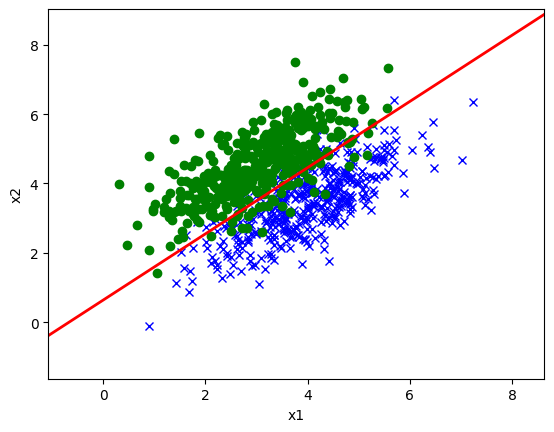

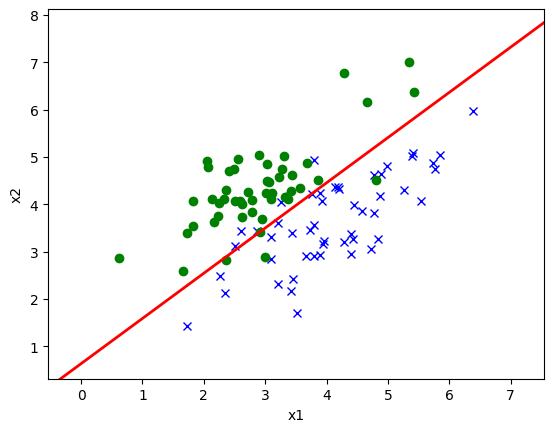

In [24]:
x_valid, y_valid = util.load_dataset(ds2_valid_set_path)
util.plot(x_train, y_train, theta= gda_model.theta)
util.plot(x_valid, y_valid, theta= gda_model.theta)